<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

CMIHBN_pheno_R8.csv  Pheno.csv	Query1.csv


In [35]:
xx = pd.read_csv(
    working_path.joinpath('Pheno.csv'),
    index_col=None
)

In [36]:
xx.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARJK487UCN,0,9.942276,83.34,Yes,Yes
1,NDARFW670TY2,0,8.792835,80.00,Yes,Yes
2,NDARHU395FP0,0,7.407027,76.67,Yes,Yes
3,NDARHV885JFU,0,8.893794,44.47,Yes,Yes
4,NDARCP753UEW,0,8.135295,100.00,Yes,Yes


In [37]:
xx.shape

(852, 6)

Sex 1 - female, 0 - male; EHQ_Total: +100 = Fully Right-Handed, -100 = Fully Left-Handed; full_pheno: Does the participant have a full phenotypic file?

Only 333 out of 852 have the full phenotypical file. All of them signed up for commercial use.


In [ ]:
full = xx[xx['Full_Pheno'] == 'Yes']

In [ ]:
# how many males and females 
full.groupby(['Sex'])[['Full_Pheno']].count()

,Full_Pheno
Sex,
0,209
1,124


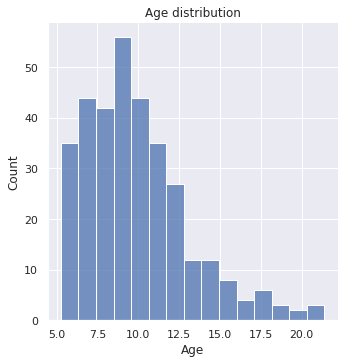

In [ ]:
sns.displot(full.Age)
pl.title('Age distribution');

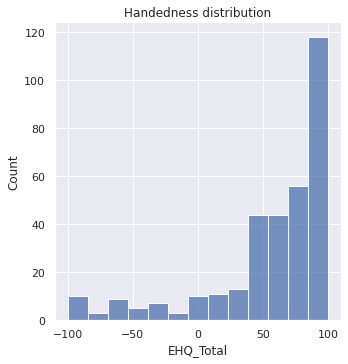

In [ ]:
sns.displot(full.EHQ_Total)
pl.title('Handedness distribution');

Right-handedness = More than +40

262


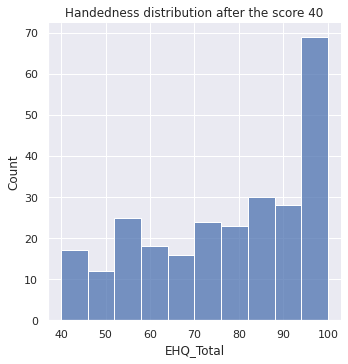

In [ ]:
# number of people whose handedness score is greater than 50
print(full[full['EHQ_Total'] >= 40].shape[0])
sns.displot(full[full['EHQ_Total'] >= 40].EHQ_Total)
pl.title('Handedness distribution after the score 40');

In [ ]:
full_right = full[full['EHQ_Total'] >= 40]

In [ ]:
full_right.shape

(262, 6)

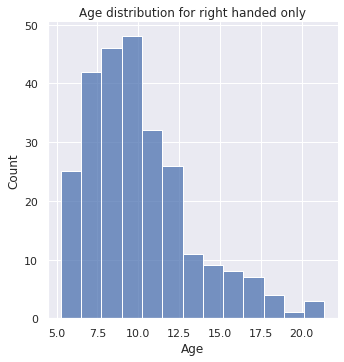

In [ ]:
sns.displot(full_right.Age)
pl.title('Age distribution for right handed only');

In [ ]:
full_right.columns

Index(['EID', 'Sex', 'Age', 'EHQ_Total', 'Commercial_Use', 'Full_Pheno'], dtype='object')

In [ ]:
age = full_right.Age.values
up_to_7 = []
in_between = []
after_10 = []
for i in range(0, len(age)):
  if age[i] < 7:
    up_to_7.append(age[i])
  elif 7 <= age[i] <= 10:
    in_between.append(age[i])
  elif age[i] > 10:
    after_10.append(age[i])

In [ ]:
print(len(up_to_7))
print(len(in_between))
print(len(after_10))

40
113
109


In [7]:
data = pd.read_csv(
    working_path.joinpath('Query1.csv'),
    index_col=None
)

In [39]:
data.head()

,Identifiers,"Basic_Demos,Age","Basic_Demos,Sex","Basic_Demos,Site","CELF,CELF_Total","ConsensusDx,DX_01","ConsensusDx,DX_01_Code","ConsensusDx,DX_01_Confirmed","ConsensusDx,DX_02","ConsensusDx,DX_02_Code",...,"WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI"
0,"NDARAA112DMH,assessment",5.545744,0,NaN,11,ADHD-Combined Type,F90.2,NaN,NaN,NaN,...,121,NaN,NaN,87,NaN,.,.,.,.,.
1,"NDARAA117NEJ,assessment",7.475929,0,NaN,11,ADHD-Combined Type,F90.2,NaN,NaN,NaN,...,99,85,89,96,85,88,77,108,84,85
2,"NDARAA504CRN,assessment",9.165297,1,NaN,12,.,.,.,.,.,...,107,73,85,80,83,100,111,95,102,97
3,"NDARAA947ZG5,assessment",13.62788,0,NaN,16,.,.,.,.,.,...,53,92,93,91,100,87,86,92,84,97
4,"NDARAA948VFH,assessment",7.98266,1,NaN,14,ADHD-Combined Type,F90.2,NaN,Enuresis,F98.0,...,96,94,95,99,96,95,98,111,94,97


In [8]:
data.columns

Index(['Identifiers', 'Basic_Demos,Age', 'Basic_Demos,Sex', 'Basic_Demos,Site',
       'CELF,CELF_Total', 'ConsensusDx,DX_01', 'ConsensusDx,DX_01_Code',
       'ConsensusDx,DX_01_Confirmed', 'ConsensusDx,DX_02',
       'ConsensusDx,DX_02_Code', 'ConsensusDx,DX_02_Confirmed',
       'ConsensusDx,DX_03', 'ConsensusDx,DX_03_Code',
       'ConsensusDx,DX_03_Confirmed', 'ConsensusDx,DX_04',
       'ConsensusDx,DX_04_Code', 'ConsensusDx,DX_04_Confirmed',
       'ConsensusDx,DX_05', 'ConsensusDx,DX_05_Code',
       'ConsensusDx,DX_05_Confirmed', 'ConsensusDx,DX_06',
       'ConsensusDx,DX_06_Code', 'ConsensusDx,DX_06_Confirmed',
       'ConsensusDx,DX_07', 'ConsensusDx,DX_07_Code',
       'ConsensusDx,DX_07_Confirmed', 'ConsensusDx,DX_08',
       'ConsensusDx,DX_08_Code', 'ConsensusDx,DX_08_Confirmed',
       'ConsensusDx,DX_09', 'ConsensusDx,DX_09_Code',
       'ConsensusDx,DX_09_Confirmed', 'ConsensusDx,DX_10',
       'ConsensusDx,DX_10_Code', 'ConsensusDx,DX_10_Confirmed',
       'DailyMed

In [9]:
data.shape

(8210, 88)

In [14]:
subset = data[[
    'Basic_Demos,Age', 'Basic_Demos,Sex',
    'EHQ,EHQ_Total', 'DailyMeds,med_dose_01', 'DailyMeds,med_dose_02',
       'DailyMeds,med_dose_03', 'DailyMeds,med_name_01',
       'DailyMeds,med_name_02', 'DailyMeds,med_name_03',
       'ConsensusDx,DX_01', 'ConsensusDx,DX_01_Code',
       'ConsensusDx,DX_01_Confirmed', 'ConsensusDx,DX_02',
       'ConsensusDx,DX_02_Code', 'ConsensusDx,DX_02_Confirmed',
       'ConsensusDx,DX_03', 'ConsensusDx,DX_03_Code',
       'ConsensusDx,DX_03_Confirmed', 'ConsensusDx,DX_04',
       'ConsensusDx,DX_04_Code', 'ConsensusDx,DX_04_Confirmed',
       'ConsensusDx,DX_05', 'ConsensusDx,DX_05_Code',
       'ConsensusDx,DX_05_Confirmed', 'ConsensusDx,DX_06',
       'ConsensusDx,DX_06_Code', 'ConsensusDx,DX_06_Confirmed',
       'ConsensusDx,DX_07', 'ConsensusDx,DX_07_Code',
       'ConsensusDx,DX_07_Confirmed', 'ConsensusDx,DX_08',
       'ConsensusDx,DX_08_Code', 'ConsensusDx,DX_08_Confirmed',
       'ConsensusDx,DX_09', 'ConsensusDx,DX_09_Code',
       'ConsensusDx,DX_09_Confirmed'
]]

In [15]:
subset.head()

,"Basic_Demos,Age","Basic_Demos,Sex","EHQ,EHQ_Total","DailyMeds,med_dose_01","DailyMeds,med_dose_02","DailyMeds,med_dose_03","DailyMeds,med_name_01","DailyMeds,med_name_02","DailyMeds,med_name_03","ConsensusDx,DX_01",...,"ConsensusDx,DX_07_Confirmed","ConsensusDx,DX_08","ConsensusDx,DX_08_Code","ConsensusDx,DX_08_Confirmed","ConsensusDx,DX_09","ConsensusDx,DX_09_Code","ConsensusDx,DX_09_Confirmed","ConsensusDx,DX_10","ConsensusDx,DX_10_Code","ConsensusDx,DX_10_Confirmed"
0,5.545744,0,40,NaN,NaN,NaN,NaN,NaN,NaN,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.475929,0,62.2,40mg- 1 puff,NaN,NaN,Qvar,NaN,NaN,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.165297,1,73.34,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,13.62788,0,80,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,7.98266,1,90,.,.,.,.,.,.,ADHD-Combined Type,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
subset['EHQ,EHQ_Total'].values[0]

'40'

In [25]:
# create a code that will identify all the drugs here
print(subset['DailyMeds,med_name_01'].unique())
print(subset['DailyMeds,med_name_02'].unique())
print(subset['DailyMeds,med_name_03'].unique())

[nan 'Qvar' '.' 'Zoloft' 'Depakote' 'Methylphenidate' 'Focalin'
 'amoxicillian' 'Abilify' 'vyvanse' 'Strattera' 'Concerta' 'abilify'
 'Budesonide' 'Prozac' 'diphacalydramine' 'Folcaline XR' 'conerta'
 'Dramamine' 'Detrol LA' 'Claritin' 'Celexa' 'Focalin XR' 'Tenex'
 'concerta' 'Ibuprofen ' 'Guanfacine' 'Singular' 'Antiobiotic' 'Symbacort'
 'Singulair' 'Topomax' 'Robitussin' 'Albuterol' 'Fluoxetine (Prozac)'
 'Zyrtec' 'Allegra' 'Vyvanse' 'Vitamin D Drops' 'dimetapp' 'Zyrtec '
 'prozac' 'Iron' 'Benadryl ' 'Gildess' 'Zyrteck' 'Fluoxetine' 'Respadone'
 'Antacid (Pepcid)' 'Trileptal' 'cefdinir' 'Zyrtek' 'Zyrte C' 'Quillivant'
 'Antibiotic' 'Oneaday vitamin' 'Tylenol' 'Risperidone'
 'Stimulant (Update later once parent remembers' 'risperidone'
 'Prednisone' 'Wellbutrinxz' 'Amoxicillin' 'Straterra'
 'Birth Control (GILDES)' 'Intuniv' 'Focelin' 'Effexor' 'strattera'
 'Strattera ' 'amoxil' 'Methyl B12' 'quillavant' 'Vyvance' 'adderall'
 'Flovent' 'Amphetamine Salt ER' 'Benadryl' 'Strattera (las

In [28]:
# create a code that will identify all the drugs here
print(subset['ConsensusDx,DX_02'].unique())
#print(subset['ConsensusDx,DX_01_Code'].unique())
#print(subset['ConsensusDx,DX_01_Confirmed'].unique())

[nan '.' 'Enuresis' 'ADHD-Combined Type'
 'Other Specified Feeding or Eating Disorder' 'Separation Anxiety'
 'Autism Spectrum Disorder'
 'Specific Learning Disorder with Impairment in Reading'
 'Social Anxiety (Social Phobia)' 'Developmental Coordination Disorder'
 'Generalized Anxiety Disorder' 'Acute Stress Disorder'
 'Intellectual Disability-Mild' 'Language Disorder'
 'Major Depressive Disorder' 'ADHD-Inattentive Type'
 'Other Specified Insomnia Disorder'
 'Other Specified Trauma- and Stressor-Related Disorder' 'Encopresis'
 'Hoarding Disorder' 'Other Specified Depressive Disorder'
 'Tourettes Disorder' 'Agoraphobia' 'Adjustment Disorders'
 'Specific Phobia' 'Other Specified Anxiety Disorder'
 'Obsessive-Compulsive Disorder' 'Disruptive Mood Dysregulation Disorder'
 'Other Specified Attention-Deficit/Hyperactivity Disorder'
 'Specific Learning Disorder with Impairment in Mathematics'
 'Speech Sound Disorder' 'Excoriation (Skin-Picking) Disorder'
 'Unspecified Intellectual Disability

In [30]:
print(subset['ConsensusDx,DX_01'].unique())
print(subset['ConsensusDx,DX_02'].unique())
print(subset['ConsensusDx,DX_03'].unique())
print(subset['ConsensusDx,DX_04'].unique())
print(subset['ConsensusDx,DX_05'].unique())
print(subset['ConsensusDx,DX_06'].unique())
print(subset['ConsensusDx,DX_07'].unique())
print(subset['ConsensusDx,DX_08'].unique())
print(subset['ConsensusDx,DX_09'].unique())

['ADHD-Combined Type' '.' 'Disruptive Mood Dysregulation Disorder'
 'ADHD-Inattentive Type' 'Tourettes Disorder' 'No Diagnosis Given'
 'Autism Spectrum Disorder'
 'Other Specified Attention-Deficit/Hyperactivity Disorder'
 'Specific Learning Disorder with Impairment in Reading'
 'No Diagnosis Given: Incomplete Eval' 'Specific Phobia'
 'ADHD-Hyperactive/Impulsive Type' 'Generalized Anxiety Disorder'
 'Specific Learning Disorder with Impairment in Mathematics'
 'Other Specified Anxiety Disorder' 'Intellectual Disability-Mild'
 'Bipolar I Disorder' nan 'Obsessive-Compulsive Disorder'
 'Other Specified Depressive Disorder'
 'Unspecified Attention-Deficit/Hyperactivity Disorder'
 'Social Anxiety (Social Phobia)' 'Separation Anxiety'
 'Major Depressive Disorder' 'Persistent Depressive Disorder (Dysthymia)'
 'Other Specified Tic Disorder' 'Language Disorder'
 'Specific Learning Disorder with Impairment in Written Expression'
 'Enuresis' 'Major Neurocognitive Disorder Due to Epilepsy' 'Encopre